In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
X_train[0].shape

(28, 28)

In [6]:
y_train[0]

5

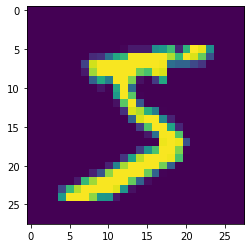

In [7]:
plt.imshow(X_train[0])

In [16]:
X_train=X_train.reshape((X_train.shape[0],28,28,1))
X_test=X_test.reshape((X_test.shape[0],28,28,1))

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [14]:
cnn=Sequential([
    #cnn layers
    layers.Conv2D(filters=28,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=56,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense layer
    layers.Flatten(),
    layers.Dense(56,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [15]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 56)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1400)              0         
                                                                 
 dense_2 (Dense)             (None, 56)               

In [17]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 66s 5ms/step - loss: 0.2561 - accuracy: 0.9468
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0633 - accuracy: 0.9809
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0485 - accuracy: 0.9851
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0398 - accuracy: 0.9879
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0344 - accuracy: 0.9895


In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0466 - accuracy: 0.9873


[0.04662200063467026, 0.9872999787330627]